In [149]:
# Để quản lý dữ liệu trong dataframe
import pandas as pd

# Để vẽ các loại biểu đồ
import matplotlib.pyplot as plt

In [150]:
# Sử dụng XGBoost cho bài toán hồi quy
from xgboost import XGBRegressor

# Import các hàm và lớp cần thiết cho việc chia dữ liệu và tìm siêu tham số
from sklearn.model_selection import (KFold,
                                     train_test_split,
                                     RandomizedSearchCV)

# Import các độ đo đánh giá mô hình hồi quy
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score)

# 1.&nbsp;Đọc dữ liệu

In [151]:
# Đặt đường dẫn tới tệp CSV chứa dữ liệu đã được làm sạch
dataset_path = "../data/CarPricePrediction_OneHot.csv"

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(dataset_path)

In [152]:
# Hiển thị vài dòng đầu tiên của DataFrame để xem nhanh về dữ liệu
df.head()

,Năm sản xuất,Số Km đã đi,Số chỗ,Màu sắc_be,Màu sắc_bạc,Màu sắc_cam,Màu sắc_ghi,Màu sắc_nâu,Màu sắc_trắng,Màu sắc_tím,...,Xuất xứ_Thái Lan,Xuất xứ_Trung Quốc,Xuất xứ_Việt Nam,Xuất xứ_Đang cập nhật,Xuất xứ_Đài Loan,Xuất xứ_Đức,Xuất xứ_Ấn Độ,Đối tác_No,Đối tác_Yes,Giá
0,2022,50000,7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,559000000
1,2019,52000,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,335000000
2,2003,50000,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,106000000
3,2021,42,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,450000000
4,2022,51000,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,534000000


# 2.&nbsp;Train - Test Split

In [153]:
# Chia tập dữ liệu thành đặc trưng đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# In kích thước
print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")

Kích thước X: (2685, 393)
Kích thước y: (2685,)


In [154]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử với tỷ lệ kiểm thử là 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In kích thước tập huấn luyện
print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước y_train: {y_train.shape}\n")

# In kích thước tập kiểm thử
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_test: {y_test.shape}")

Kích thước X_train: (2148, 393)
Kích thước y_train: (2148,)

Kích thước X_test: (537, 393)
Kích thước y_test: (537,)


# 3.&nbsp;Chạy mô hình với tham số mặc định

In [155]:
# Tạo một XGBRegressor với các tham số mặc định
xgb_res = XGBRegressor()

# Xem các tham số mặc định
default_params = xgb_res.get_params()

# Chọn ra các tham số mà bạn quan tâm
desired_params = ['reg_lambda', 'reg_alpha', 'n_estimators', 'max_depth', 'learning_rate', 'gamma', 'colsample_bytree']

# Lọc các tham số mà bạn quan tâm từ tham số mặc định
selected_default_params = {param: default_params[param] for param in desired_params}

# Tạo DataFrame từ các tham số mà bạn quan tâm
default_params_df = pd.DataFrame([selected_default_params])

# Đảo ngược vị trí giữa tên tham số và giá trị
default_params_df = default_params_df.transpose()

# Đặt tên cột cho DataFrame
default_params_df.columns = ['Value']

# In ra DataFrame với tên tham số ở các dòng
print("Các tham số mặc định của XGBRegressor:")
default_params_df

Các tham số mặc định của XGBRegressor:


,Value
reg_lambda,None
reg_alpha,None
n_estimators,100
max_depth,None
learning_rate,None
gamma,None
colsample_bytree,None


In [156]:
# Tạo một XGBRegressor với các tham số mặc định
xgb_res = XGBRegressor()

# Huấn luyện XGBRegressor trên dữ liệu huấn luyện
# và đưa ra dự đoán trên dữ liệu kiểm thử
xgb_res.fit(X_train, y_train)
y_pred = xgb_res.predict(X_test)

# In các độ đo đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2) Score: {r2:.3f}")

Mean Squared Error (MSE): 77129143307708336.000
Mean Absolute Error (MAE): 113282167.331
R-squared (R2) Score: 0.752


# 4.&nbsp;Fine - Tuning

In [157]:
# Lấy các tham số cần được điều chỉnh
params = {
    # "n_estimators": Số lần lặp của quá trình boosting.
    "n_estimators": range(100, 500, 50),

    # "learning_rate": Tỉ lệ học, giảm trọng số để làm cho quá trình boosting thêm thận trọng.
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1],

    # "max_depth": Độ sâu tối đa của cây, ảnh hưởng đến độ phức tạp của mô hình.
    "max_depth": range(3, 21, 3),

    # "gamma": Điều chỉnh mức giảm tổn thất tối thiểu để thực hiện một phân chia.
    "gamma": [i / 10.0 for i in range(0, 5)],

    # "colsample_bytree": Phần trăm cột được lấy mẫu ngẫu nhiên cho mỗi cây.
    "colsample_bytree": [i / 10.0 for i in range(3, 10)],

    # "reg_alpha": Chế độ chính quy L1, giảm overfitting và làm mô hình thêm thận trọng.
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],

    # "reg_lambda": Chế độ chính quy L2, giảm overfitting và làm mô hình thêm thận trọng.
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

# Tạo và huấn luyện mô hình tinh chỉnh cho XGBoost Regressor
rs = RandomizedSearchCV(XGBRegressor(),
                        params,
                        n_iter=50,
                        verbose=3,
                        random_state=42)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.0001, max_depth=12, n_estimators=250, reg_alpha=10, reg_lambda=0.1;, score=-1.019 total time=   1.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.0001, max_depth=12, n_estimators=250, reg_alpha=10, reg_lambda=0.1;, score=-0.352 total time=   1.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.0001, max_depth=12, n_estimators=250, reg_alpha=10, reg_lambda=0.1;, score=-0.786 total time=   1.4s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.0001, max_depth=12, n_estimators=250, reg_alpha=10, reg_lambda=0.1;, score=-0.636 total time=   1.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.0001, max_depth=12, n_estimators=250, reg_alpha=10, reg_lambda=0.1;, score=-0.988 total time=   0.9s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=1, max_depth=18, n_estimators=450, reg_alpha=1, reg_lambda=100;

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'n_estimators': range(100, 500, 50),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   random_state=42, verbose=3)

In [158]:
# In điểm số tốt nhất và các tham số tốt nhất
# khi Random Search với các tham số trên
print(f'Điểm số tốt nhất: {rs.best_score_:.3f}')

# Tạo DataFrame từ các tham số tốt nhất
best_params_df = pd.DataFrame([rs.best_params_]).transpose()

# Đặt tên cột cho DataFrame
best_params_df.columns = ['Value']

# In ra DataFrame với tên tham số ở các dòng
print('Các tham số tốt nhất:')
best_params_df

Điểm số tốt nhất: 0.620
Các tham số tốt nhất:


,Value
reg_lambda,1.0
reg_alpha,1.0
n_estimators,450.0
max_depth,12.0
learning_rate,0.1
gamma,0.3
colsample_bytree,0.7


In [159]:
# Trích xuất thông tin kết quả Random Search và chuyển đổi thành DataFrame
results_df = pd.DataFrame(rs.cv_results_)

# Lựa chọn các cột quan trọng cho phân tích
selected_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_df = results_df[selected_columns]

# Sắp xếp DataFrame dựa trên rank_test_score theo thứ tự tăng dần
results_df = results_df.sort_values(by='rank_test_score')

# Lưu DataFrame đã lựa chọn vào một tệp CSV
results_df.to_csv('../fine-tuning/RandomSearch_CV_XGBoost_OneHot', index=False)

# 5.&nbsp;Đánh giá mô hình với tham số tốt nhất

## 5.1.&nbsp;Train - Test Split

In [160]:
# Tạo một XGBRegressor với các tham số tốt nhất
xgb_best = XGBRegressor(**rs.best_params_)

# Huấn luyện XGBRegressor trên dữ liệu huấn luyện
# và đưa ra dự đoán trên dữ liệu kiểm thử
xgb_best.fit(X_train, y_train)
y_pred = xgb_best.predict(X_test)

# In các độ đo đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2) Score: {r2:.3f}")

Mean Squared Error (MSE): 77627100053414144.000
Mean Absolute Error (MAE): 102404944.313
R-squared (R2) Score: 0.750


## 5.2.&nbsp;Cross Validation (K-Fold)

In [161]:
# Sử dụng KFold với 10 folds và hoán đổi dữ liệu trước mỗi lần chia
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Danh sách để lưu các giá trị MSE, MAE và R2 cho từng fold
mses = []
maes = []
r2s = []

# Vòng lặp qua các fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i + 1}:")  # Đánh số fold từ 1 để hiển thị

    # Huấn luyện mô hình trên tập huấn luyện của fold hiện tại
    xgb_best.fit(X[train_index], y[train_index])

    # Dự đoán trên tập kiểm tra của fold hiện tại
    y_pred = xgb_best.predict(X[test_index])

    # Tính toán các độ đo
    mse = mean_squared_error(y[test_index], y_pred)
    mae = mean_absolute_error(y[test_index], y_pred)
    r2 = r2_score(y[test_index], y_pred)

    # In các độ đo cho fold hiện tại
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R-squared (R2) Score: {r2:.3f}")

    print()  # Xuống dòng cho phần in thông tin của fold tiếp theo

    # Lưu các độ đo vào danh sách
    mses.append(mse)
    maes.append(mae)
    r2s.append(r2)

# Tính toán và in ra giá trị trung bình của các độ đo trên tất cả các fold
mean_mse = sum(mses) / len(mses)
mean_mae = sum(maes) / len(maes)
mean_r2 = sum(r2s) / len(r2s)

print(f"Mean MSEs: {mean_mse:.3f}")
print(f"Mean MAEs: {mean_mae:.3f}")
print(f"Mean R2s: {mean_r2:.3f}")

Fold 1:
Mean Squared Error (MSE): 132666423898416624.000
Mean Absolute Error (MAE): 115345005.859
R-squared (R2) Score: 0.651

Fold 2:
Mean Squared Error (MSE): 50490502894457688.000
Mean Absolute Error (MAE): 94775523.758
R-squared (R2) Score: 0.790

Fold 3:
Mean Squared Error (MSE): 62092538540027624.000
Mean Absolute Error (MAE): 107040936.223
R-squared (R2) Score: 0.839

Fold 4:
Mean Squared Error (MSE): 296064568997077632.000
Mean Absolute Error (MAE): 103391837.089
R-squared (R2) Score: 0.618

Fold 5:
Mean Squared Error (MSE): 688512036462686464.000
Mean Absolute Error (MAE): 134613017.323
R-squared (R2) Score: 0.375

Fold 6:
Mean Squared Error (MSE): 60695127222160200.000
Mean Absolute Error (MAE): 95720671.817
R-squared (R2) Score: 0.779

Fold 7:
Mean Squared Error (MSE): 106436283564139840.000
Mean Absolute Error (MAE): 106096338.134
R-squared (R2) Score: 0.789

Fold 8:
Mean Squared Error (MSE): 131603331774558336.000
Mean Absolute Error (MAE): 124496364.261
R-squared (R2) Sco

## 5.3.&nbsp;Visualization

In [162]:
def plot_metric_scores(metric_values, metric_name):
    """
    Vẽ biểu đồ cột cho các giá trị của một độ đo cụ thể.

    Parameters:
    - metric_values: Danh sách chứa giá trị của độ đo cho từng fold.
    - metric_name: Tên của độ đo (vd: 'MAE', 'MSE', 'R2').

    Returns:
    None.
    """
    
    # Tạo biểu đồ cột với metric_values
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(metric_values) + 1), metric_values, color='skyblue')
    
    # Đặt nhãn cho trục x và y
    plt.xlabel('Fold')
    plt.ylabel(f'Điểm {metric_name}')
    
    # Đặt tiêu đề cho biểu đồ
    plt.title(f'Điểm {metric_name} cho từng Fold')
    
    # Đặt các nhãn trục x là số fold
    plt.xticks(range(1, len(metric_values) + 1))
    
    # Hiển thị biểu đồ
    plt.show()

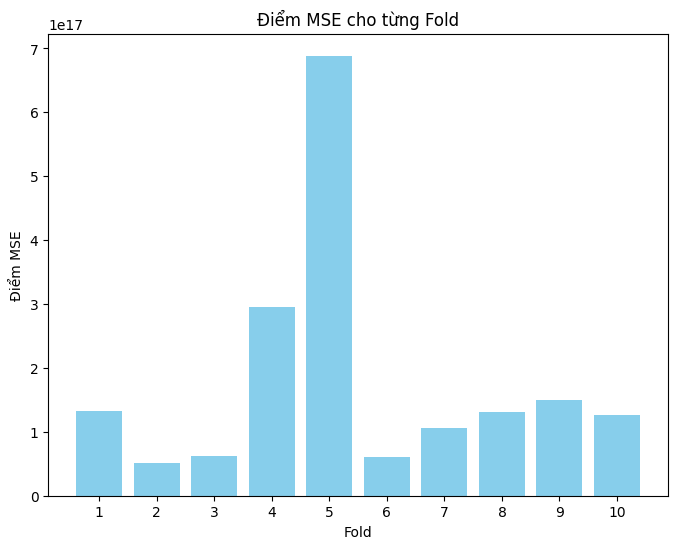

In [163]:
# Vẽ biểu đồ cho các giá trị MSE
plot_metric_scores(mses, "MSE")

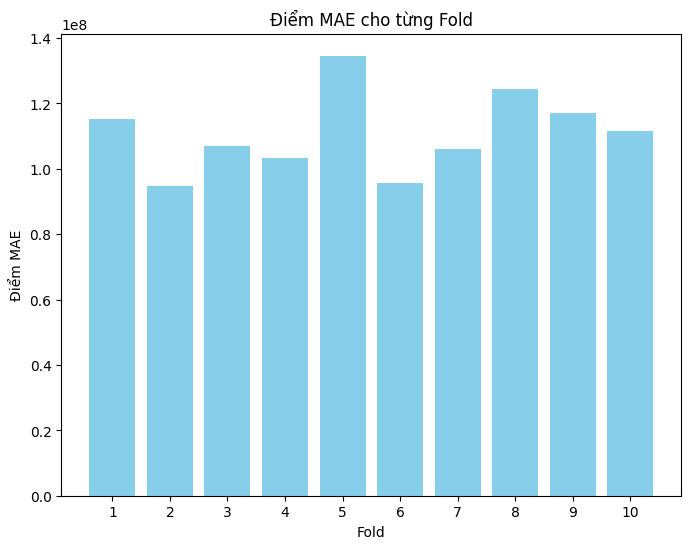

In [164]:
# Vẽ biểu đồ cho các giá trị MAE
plot_metric_scores(maes, "MAE")

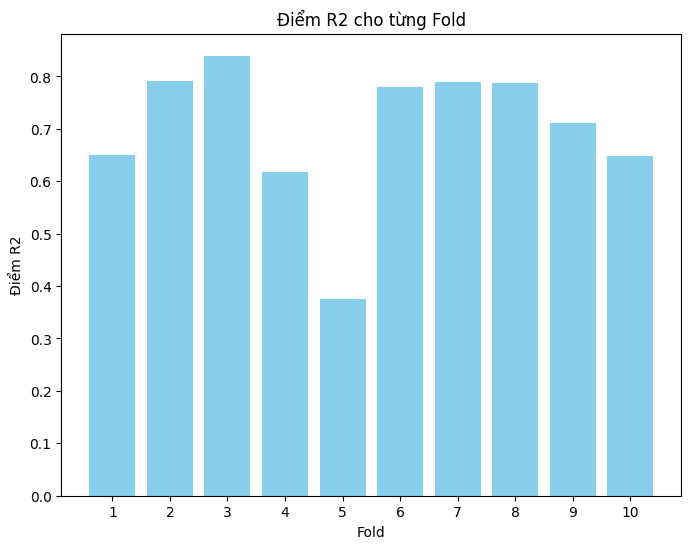

In [165]:
# Vẽ biểu đồ cho các giá trị R2
plot_metric_scores(r2s, "R2")